In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('D:\OneDrive\문서\GitHub\TIL\MachineLearning\비지도학습\군집화 모델\Mall_Customers.csv')

# 필요한 열 선택 및 결측값 처리
data = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

캐글 데이터 로드 및 전처리

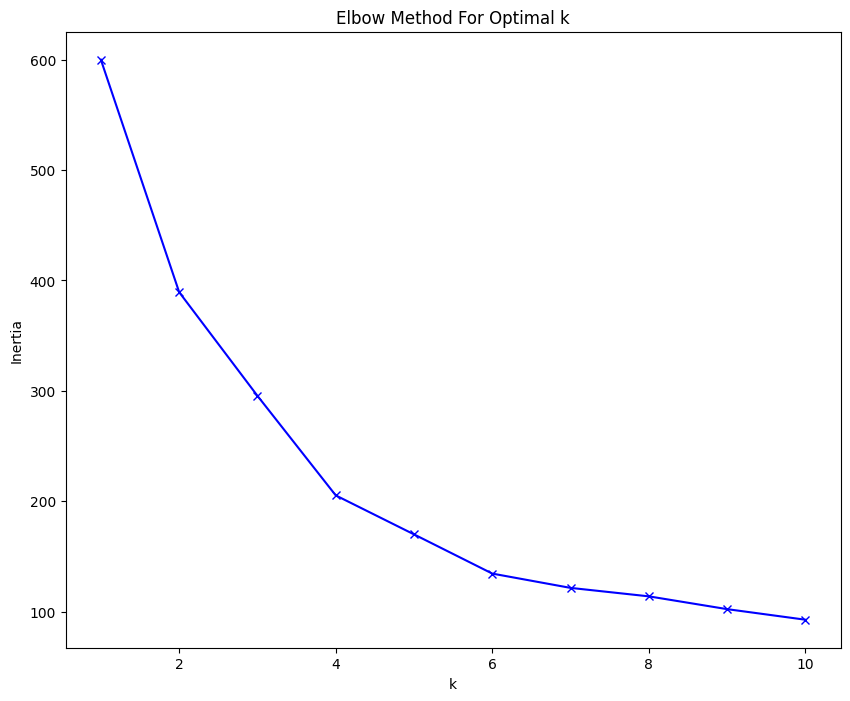

In [4]:
# 최적의 k 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 8))
plt.plot(K, inertia, 'bx-') #그래프 생성(x축, y축)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# k=5로 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)

# 군집 결과 할당
data['Cluster'] = kmeans.labels_

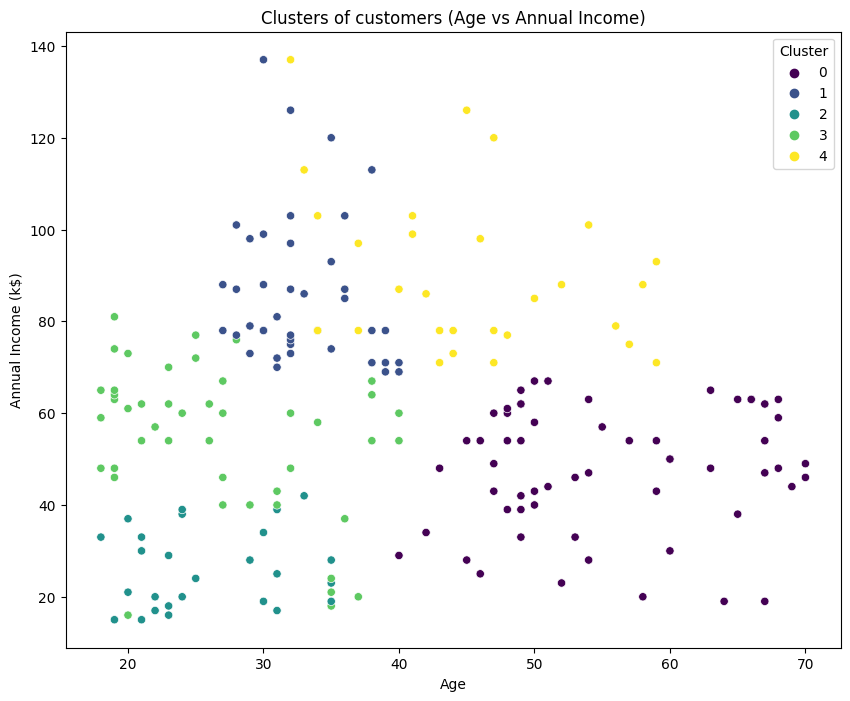

In [5]:
# 2차원으로 군집 시각화 (연령 vs 소득)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Age vs Annual Income)')
plt.show()

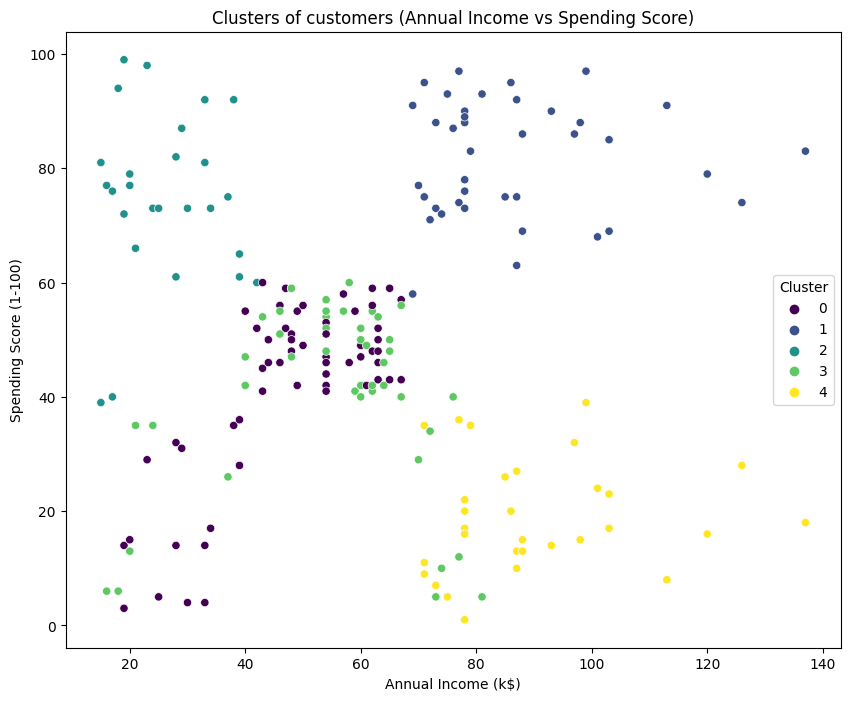

In [6]:
# 2차원으로 군집 시각화 (소득 vs 지출 점수)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster'], palette='viridis')
plt.title('Clusters of customers (Annual Income vs Spending Score)')
plt.show()

seaborn.scatterplot - 산점도